In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
from glob import glob
from utils.get_dem import get_dem
from utils.add_scale_bar import add_scale_bar
from utils.add_compass import add_compass
import cartopy.crs as ccrs
from matplotlib.colors import LinearSegmentedColormap
import cartopy.feature as cfeature
import rasterio as rio 
from rasterio.plot import show 


#### Reprojected utm image to wgs84 image

In [2]:
# path_chenghai_img = 'data/rsimg/chenghai_s2_20240418.tif'
# path_chenghai_img_wgs84 = 'data/rsimg/chenghai_s2_20240418_wgs84.tif'
# path_erhai_img = 'data/rsimg/erhai_s2_20240801.tif'
# path_erhai_img_wgs84 = 'data/rsimg/erhai_s2_20240801_wgs84.tif'
# path_lugu_img = 'data/rsimg/lugu_s2_20240523.tif'
# path_lugu_img_wgs84 = 'data/rsimg/lugu_s2_20240523_wgs84.tif'
# path_2lakes_img = 'data/rsimg/qilu_yilong_s2_20240415.tif'
# path_2lakes_img_wgs84 = 'data/rsimg/qilu_yilong_s2_20240415_wgs84.tif'
# path_4lakes_img = 'data/rsimg/dianchi_fuxian_yangzonghai_xingyun_s2_20240415.tif'
# path_4lakes_img_wgs84 = 'data/rsimg/dianchi_fuxian_yangzonghai_xingyun_s2_20240415_wgs84.tif'
# !gdalwarp -overwrite -t_srs EPSG:4326 -r cubic -co COMPRESS=LZW -co TILED=YES $path_chenghai_img $path_chenghai_img_wgs84
# !gdalwarp -overwrite -t_srs EPSG:4326 -r cubic -co COMPRESS=LZW -co TILED=YES $path_erhai_img $path_erhai_img_wgs84
# !gdalwarp -overwrite -t_srs EPSG:4326 -r cubic -co COMPRESS=LZW -co TILED=YES $path_lugu_img $path_lugu_img_wgs84
# !gdalwarp -overwrite -t_srs EPSG:4326 -r cubic -co COMPRESS=LZW -co TILED=YES $path_2lakes_img $path_2lakes_img_wgs84
# !gdalwarp -overwrite -t_srs EPSG:4326 -r cubic -co COMPRESS=LZW -co TILED=YES $path_4lakes_img $path_4lakes_img_wgs84


In [3]:
## region of yunnan
path_vec_yunnan = 'data/yunnan-vec/yunnan_boundary.geojson'
path_srtm_down = 'data/dem/hma_SRTMGL3_down.tif' 
## boundaries of nine lakes
path_chenghai_vec = 'data/lakes-vec/chenghai_s2_20240418.geojson'
path_dianchi_vec = 'data/lakes-vec/dianchi_s2_20240415.geojson'
path_erhai_vec = 'data/lakes-vec/erhai_s2_20240801.geojson'
path_fuxian_vec = 'data/lakes-vec/fuxian_s2_20240415.geojson'
path_lugu_vec = 'data/lakes-vec/lugu_s2_20240523.geojson'
path_qilu_vec = 'data/lakes-vec/qilu_s2_20240415.geojson'
path_xingyun_vec = 'data/lakes-vec/xingyun_s2_20240415.geojson'
path_yangzonghai_vec = 'data/lakes-vec/yangzonghai_s2_20240415.geojson'
path_yilong_vec = 'data/lakes-vec/yilong_s2_20240415.geojson'
## remote sensing image of nine lakes
path_chenghai_img = 'data/rsimg/chenghai_s2_20240418_wgs84.tif'
path_lugu_img = 'data/rsimg/lugu_s2_20240523_wgs84.tif'
path_erhai_img = 'data/rsimg/erhai_s2_20240801_wgs84.tif'
path_2lakes_img = 'data/rsimg/qilu_yilong_s2_20240415_wgs84.tif'
path_4lakes_img = 'data/rsimg/dianchi_fuxian_yangzonghai_xingyun_s2_20240415_wgs84.tif'


In [4]:
## read yunnan vector
yunnan_vec_gpd = gpd.read_file(path_vec_yunnan)
## read lake vector
chenghai_vec_gpd = gpd.read_file(path_chenghai_vec)
dianchi_vec_gpd = gpd.read_file(path_dianchi_vec)
erhai_vec_gpd = gpd.read_file(path_erhai_vec)
fuxian_vec_gpd = gpd.read_file(path_fuxian_vec)
lugu_vec_gpd = gpd.read_file(path_lugu_vec)
qilu_vec_gpd = gpd.read_file(path_qilu_vec)
xingyun_vec_gpd = gpd.read_file(path_xingyun_vec)
yilong_vec_gpd = gpd.read_file(path_yilong_vec)
yangzonghai_vec_gpd = gpd.read_file(path_yangzonghai_vec)
## read image
src_chenghai_img = rio.open(path_chenghai_img)
src_erhai_img = rio.open(path_erhai_img)
src_lugu_img = rio.open(path_lugu_img)
src_2lakes_img = rio.open(path_2lakes_img)
src_4lakes_img = rio.open(path_4lakes_img)



In [5]:
points_dict = {}
points_name = ['chenghai', 'dianchi', 'erhai', 'fuxian', 'lugu', 'qilu', 'xingyun', 'yangzonghai', 'yilong']
points_gpd = [chenghai_vec_gpd, dianchi_vec_gpd, erhai_vec_gpd, fuxian_vec_gpd,
              lugu_vec_gpd, qilu_vec_gpd, xingyun_vec_gpd, yangzonghai_vec_gpd,
              yilong_vec_gpd]
for i, name in enumerate(points_name):
    points_dict[name] = points_gpd[i].to_crs(epsg=3857).centroid.to_crs(epsg=4326)
points_dict


{'chenghai': 0    POINT (100.66397 26.55042)
 dtype: geometry,
 'dianchi': 0    POINT (102.68837 24.81727)
 dtype: geometry,
 'erhai': 0    POINT (100.19521 25.78852)
 dtype: geometry,
 'fuxian': 0    POINT (102.88641 24.51948)
 dtype: geometry,
 'lugu': 0    POINT (100.78858 27.70741)
 dtype: geometry,
 'qilu': 0    POINT (102.77260 24.16613)
 dtype: geometry,
 'xingyun': 0    POINT (102.78426 24.33719)
 dtype: geometry,
 'yangzonghai': 0    POINT (103.00236 24.91190)
 dtype: geometry,
 'yilong': 0    POINT (102.56719 23.67282)
 dtype: geometry}

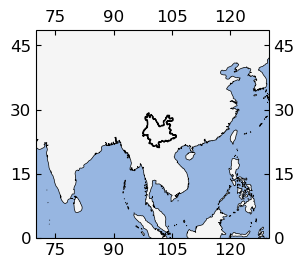

In [6]:
region = [96, 107.5, 20.5, 30]
region_x = [region[0], region[1], region[1], region[0], region[0]]
region_y = [region[2], region[2], region[3], region[3], region[2]]
fig = plt.figure(figsize=(3, 3))
plt.rcParams.update({'font.size':12})
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([70, 130, 0, 45.0])
### plot hma boundary
gridl = ax.gridlines(draw_labels=False, linewidth=0.)
yunnan_vec_gpd.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)
### plot rectangle
# plt.plot(region_x, region_y, transform=ccrs.PlateCarree(), linewidth=2, color='blue')
ax.tick_params(labelbottom=True,  labeltop=True, labelleft=True, labelright=True,
                     bottom=True, top=True,      left=True, right=True, direction="in")                     
### plot auxlliary data
ax.add_feature(cfeature.LAND, facecolor='WhiteSmoke')
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.OCEAN)

### Set figure
ax.set_xticks([75,  90, 105, 120])
ax.set_yticks([0, 15, 30, 45])
gridl.xlabel_style = {'size': 10}
gridl.ylabel_style = {'size': 10}


In [7]:
src_srtm_down = rio.open(path_srtm_down)
src_srtm_down.read()
src_srtm_down.bounds
src_srtm_down_extent = [
    src_srtm_down.bounds.left, src_srtm_down.bounds.right,
    src_srtm_down.bounds.bottom, src_srtm_down.bounds.top]
src_srtm_down_extent


[94.8995833332709, 110.09958333326745, 19.900416666675778, 30.10041666667346]

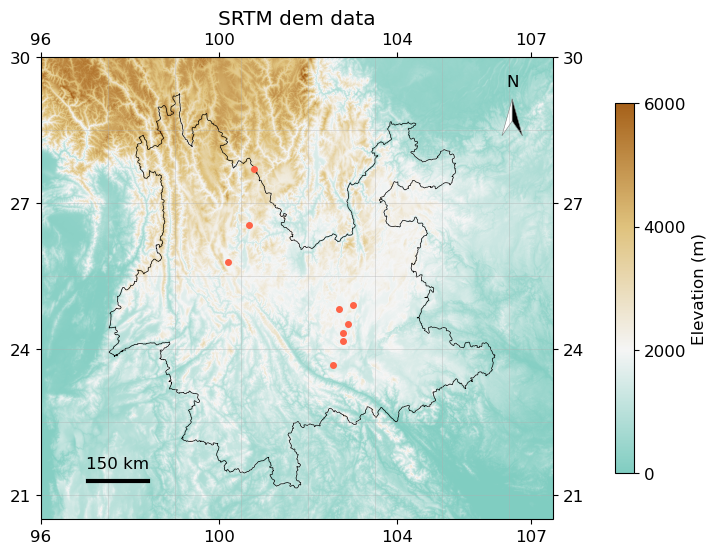

In [8]:
src_srtm_down = rio.open(path_srtm_down)
src_srtm_down_extent = [
    src_srtm_down.bounds.left, src_srtm_down.bounds.right, 
    src_srtm_down.bounds.bottom, src_srtm_down.bounds.top]

### visualize dem 
colors = [(128/255, 205/255, 193/255), (245/255, 245/255, 245/255), \
          (223/255, 194/255, 125/255), (166/255, 97/255, 26/255)]
cmap_dem = LinearSegmentedColormap.from_list('linear color', colors)
fig = plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size':12})
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([96, 107.5, 20.5, 30])
ax_img = ax.imshow(src_srtm_down.read(1), cmap=cmap_dem, clim=[0, 6000], alpha=1, extent=src_srtm_down_extent)
ax.set_title('SRTM dem data')
cbar = fig.colorbar(ax_img, ax=ax, fraction=0.03, pad=0.1, label='Elevation (m)', shrink=0.8, ticks=[0, 2000, 4000, 6000])
cbar.ax.tick_params(labelsize=12)
### Visualize vector
yunnan_vec_gpd.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)
gridl = ax.gridlines(draw_labels=False, linewidth=0.5, alpha=0.5, zorder=1)
ax.set_xticks([96, 100, 104, 107])
ax.set_yticks([21, 24, 27, 30])
ax.tick_params(labelbottom=True,  labeltop=True, labelleft=True, labelright=True,
                     bottom=True, top=True, left=True, right=True)                     
gridl.xlabel_style = {'size': 10}
gridl.ylabel_style = {'size': 10}
add_scale_bar(ax, length=150, location=(0.15, 0.08), linewidth=3)
add_compass(ax=ax, location=(0.92, 0.87), size_height=0.04,size_width=0.04, font_N=12, edge_color_narrow='gray', edge_width_narrow=0.4)

### add locations of lakes
points_name = list(points_dict.keys())
for i, point_gpd in enumerate(points_dict.values()):
    point_gpd.plot(ax=ax, color='Tomato', markersize=16, marker='o')
    # ax.text(point_gpd[0].x, point_gpd[0].y, points_name[i])
# plt.savefig('figures/lakes_yunnan.png', bbox_inches='tight', dpi=100)


#### show remote sensing image

In [9]:
print('chenghai:', chenghai_vec_gpd.total_bounds)
print('erhai:', erhai_vec_gpd.total_bounds)
print('lugu:', lugu_vec_gpd.total_bounds)


chenghai: [100.63776935  26.46270667 100.69175564  26.6303591 ]
erhai: [100.09632177  25.60251631 100.28881855  25.96415456]
lugu: [100.7443843   27.66375274 100.83568452  27.74883192]


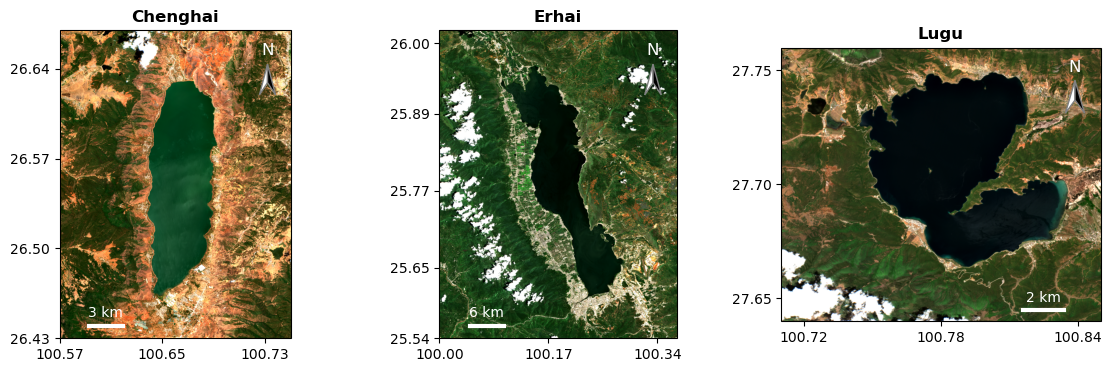

In [12]:
fig, ax = plt.subplots(1,3, figsize=(14, 4), subplot_kw={'projection': ccrs.PlateCarree()})
plt.rcParams.update({'font.size':10})
## chenghai
ax[0].set_extent([100.57, 100.75, 26.43, 26.67])
show(src_chenghai_img, indexes=(3,2,1), percent_range=[5,95], ax=ax[0], title='Chenghai')
add_scale_bar(ax=ax[0], length=3, location=(0.2, 0.04), linewidth=3, color_bar='white', color_text='white')
add_compass(ax=ax[0], location=(0.9, 0.84), color_N='white', size_width=0.07)
ax[0].set_xticks([100.57, 100.65, 100.73]); ax[0].set_yticks([26.43, 26.5, 26.57, 26.64]);
## erhai
ax[1].set_extent([100, 100.37, 25.54, 26.02])
show(src_erhai_img,indexes=(3,2,1), percent_range=[5,95], ax=ax[1], title='Erhai')
add_scale_bar(ax=ax[1], length=6, location=(0.2, 0.04), linewidth=3, color_bar='white', color_text='white')
add_compass(ax=ax[1], location=(0.9, 0.84), color_N='white', size_width=0.07)
ax[1].set_xticks([100, 100.17, 100.34]); ax[1].set_yticks([25.54, 25.65, 25.77, 25.89, 26]);
## lugu
ax[2].set_extent([100.71, 100.85, 27.64, 27.76])
show(src_lugu_img,indexes=(3,2,1), percent_range=[5,95], ax=ax[2], title='Lugu')
add_scale_bar(ax=ax[2], length=2, location=(0.82, 0.04), linewidth=3, color_bar='white', color_text='white')  
add_compass(ax=ax[2], location=(0.92, 0.82), color_N='white', size_width=0.06, size_height=0.06)
ax[2].set_xticks([100.72, 100.78, 100.84]); ax[2].set_yticks([27.65, 27.70, 27.75]);


In [26]:
print('qilu:', qilu_vec_gpd.total_bounds)
print('yilong:', yilong_vec_gpd.total_bounds)


qilu: [102.71828647  24.13751316 102.81529464  24.20404323]
yilong: [102.50086225  23.64804577 102.62839214  23.70079086]


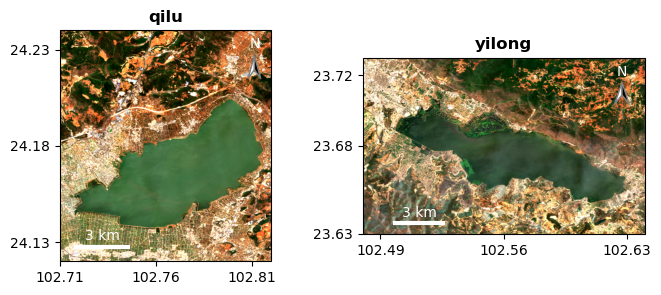

In [32]:
fig, ax = plt.subplots(1,2, figsize=(8, 3), subplot_kw={'projection': ccrs.PlateCarree()})
plt.rcParams.update({'font.size':10})
## qilu
ax[0].set_extent([102.71, 102.82, 24.12, 24.24])
show(src_2lakes_img, indexes=(3,2,1), percent_range=[5,95], ax=ax[0], title='qilu')
add_scale_bar(ax=ax[0], length=3, location=(0.2, 0.06), linewidth=3, color_bar='white', color_text='white')
add_compass(ax=ax[0], location=(0.92, 0.84), color_N='white', size_width=0.06, size_height=0.05, font_N=10)
ax[0].set_xticks([102.71, 102.76, 102.81]); ax[0].set_yticks([24.13, 24.18, 24.23]);

## yilong
ax[1].set_extent([102.48, 102.64, 23.63, 23.73])
show(src_2lakes_img, indexes=(3,2,1), percent_range=[5,95], ax=ax[1], title='yilong')
add_scale_bar(ax=ax[1], length=3, location=(0.2, 0.06), linewidth=3, color_bar='white', color_text='white')
add_compass(ax=ax[1], location=(0.92, 0.8), color_N='white', size_height=0.06, font_N=10)
ax[1].set_xticks([102.49, 102.56, 102.63]); ax[1].set_yticks([23.63, 23.68, 23.72]);



In [13]:
print('dianchi:', dianchi_vec_gpd.total_bounds)
print('fuxian:', fuxian_vec_gpd.total_bounds)
print('xingyun:', xingyun_vec_gpd.total_bounds)
print('yangzonghai:', yangzonghai_vec_gpd.total_bounds)


dianchi: [102.59653028  24.66901512 102.78559272  24.96313528]
fuxian: [102.82089107  24.35515808 102.95765363  24.63299861]
xingyun: [102.75347764  24.2895903  102.80828019  24.38509493]
yangzonghai: [102.98016708  24.85775338 103.02704546  24.96634837]


[Text(102.97, 0, '102.97'),
 Text(103.0, 0, '103.00'),
 Text(103.03, 0, '103.03')]

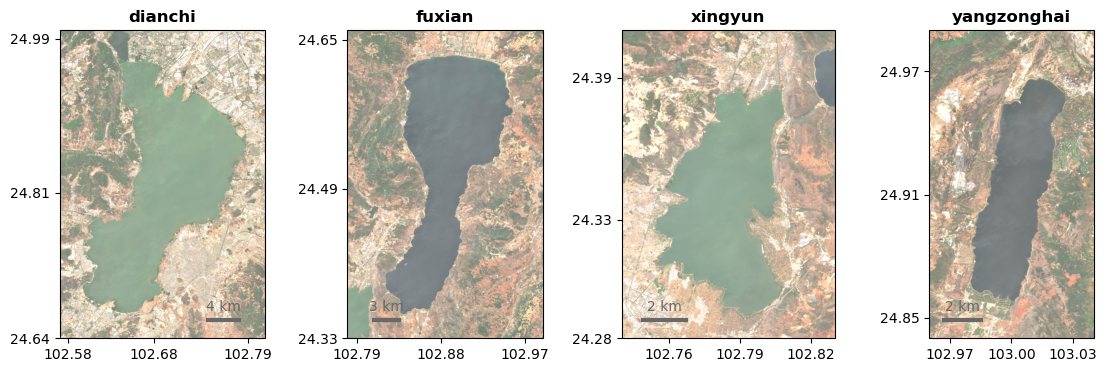

In [14]:
fig, ax = plt.subplots(1,4, figsize=(14, 4), subplot_kw={'projection': ccrs.PlateCarree()})
plt.rcParams.update({'font.size':10})
## dianchi
ax[0].set_extent([102.57, 102.81, 24.64, 25])
show(src_4lakes_img, indexes=(3,2,1), percent_range=[5,95], ax=ax[0], title='dianchi')
add_scale_bar(ax=ax[0], length=4, location=(0.8, 0.06), linewidth=3, color_bar='DimGrey', color_text='DimGrey')
ax[0].set_xticks([102.58, 102.68, 102.79]); ax[0].set_yticks([24.64, 24.81, 24.99]);

## fuxian
ax[1].set_extent([102.78, 102.99, 24.33, 24.66])
show(src_4lakes_img, indexes=(3,2,1), percent_range=[5,95], ax=ax[1], title='fuxian')
add_scale_bar(ax=ax[1], length=3, location=(0.2, 0.06), linewidth=3, color_bar='DimGrey', color_text='DimGrey')
ax[1].set_xticks([102.79, 102.88, 102.97]); ax[1].set_yticks([24.33, 24.49, 24.65]);

## xingyun 
ax[2].set_extent([102.74, 102.83, 24.28, 24.41])
show(src_4lakes_img, indexes=(3,2,1), percent_range=[5,95], ax=ax[2], title='xingyun')
add_scale_bar(ax=ax[2], length=2, location=(0.2, 0.06), linewidth=3, color_bar='DimGrey', color_text='DimGrey')
ax[2].set_xticks([102.76, 102.79, 102.82]); ax[2].set_yticks([24.28, 24.33, 24.39]);

## yangzonghai
ax[3].set_extent([102.96, 103.04, 24.84, 24.99])
show(src_4lakes_img, indexes=(3,2,1), percent_range=[5, 95], ax=ax[3], title='yangzonghai')
add_scale_bar(ax=ax[3], length=2, location=(0.2, 0.06), linewidth=3, color_bar='DimGrey', color_text='DimGrey')
ax[3].set_xticks([102.97, 103, 103.03]); ax[3].set_yticks([24.85, 24.91, 24.97]); 
ax[3].set_xticklabels(['102.97', '103.00', '103.03'])
